In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("csvs//Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8367,8368,15806941,Sharpe,499,France,Male,60,7,76961.6,2,1,1,83643.87,0
4904,4905,15678720,Evans,741,France,Female,44,7,0.0,2,1,1,190534.76,0
656,657,15813741,Nnachetam,549,Spain,Male,25,6,193858.2,1,0,1,21600.11,0
4633,4634,15707291,Percy,477,Germany,Male,48,8,129250.0,2,1,1,157937.35,0
9083,9084,15711396,Henderson,427,Spain,Male,40,8,0.0,2,1,1,82870.75,0


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2778,604,Spain,Female,71,10,0.00,2,1,1,129984.20,0
2610,682,France,Male,38,4,107192.38,1,1,1,15669.17,0
2017,728,Spain,Female,37,4,0.00,1,0,0,4539.38,0
2821,714,Spain,Female,33,10,103121.33,2,1,1,49672.01,0


In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
cols = df.select_dtypes('number').columns 
df_ints = df.loc[:, cols]
df_ints

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


# OUTLIER DETECTION

In [8]:
# OPTION 3: iqr filter: within 2.22 IQR (equiv. to z-score < 3)
iqr = df_ints.quantile(0.75, numeric_only=True) - df_ints.quantile(0.25, numeric_only=True)
lim = np.abs((df_ints - df_ints.median()) / iqr) < 2.22


# replace outliers with nan
df_ints.loc[:, cols] = df_ints.where(lim, np.nan)
df_ints.isna().sum()

CreditScore            6
Age                  319
Tenure                 0
Balance                0
NumOfProducts         60
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited             10000
dtype: int64

In [9]:
salary_yes = df[df.Exited == 1].EstimatedSalary
salary_no = df[df.Exited  == 0].EstimatedSalary

Text(0.5, 1.0, 'Customer Churn Prediction Visualiztion')

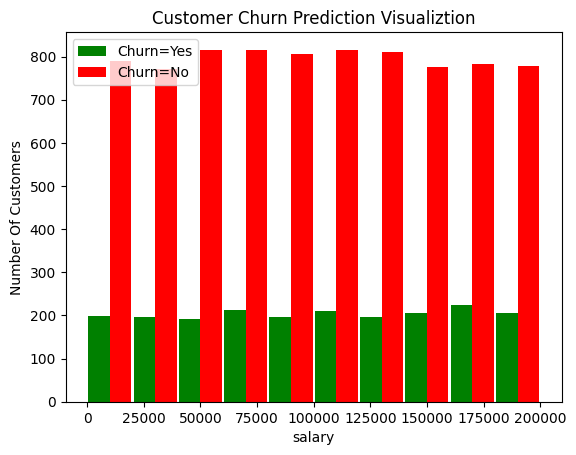

In [10]:
plt.hist([salary_yes, salary_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel("salary")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

In [11]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# FEATURE ENGINEERING

In [12]:
def print_unique(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col}: {df[col].unique()}')

In [13]:
print_unique(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


# OHE

In [14]:
df1 = pd.get_dummies(data = df, columns = ['Gender', 'Geography'], drop_first = True, dtype = float)
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1.0,1.0,0.0


# SCALING

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
col_to_scale=['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [17]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.0,0.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.0,0.0,1.0


In [18]:
X = df1.drop('Exited',axis = 1)
y = df1.Exited

# DEALING WITH SKEWDNESS

In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    
    model.fit(X_train, y_train, epochs=10)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.sample()

3759    0
Name: Exited, dtype: int64

In [22]:
X_train.shape[1]

11

In [23]:
ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/10
250/250 [==============================] - 2s 2ms/step - loss: 0.5007 - accuracy: 0.7930
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4711 - accuracy: 0.7945
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4609 - accuracy: 0.7945
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4538 - accuracy: 0.7946
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4468 - accuracy: 0.8006
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.8081
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4354 - accuracy: 0.8133
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4324 - accuracy: 0.8161
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4290 - accuracy: 0.8176
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8190
[

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

# METHOD 1, OVERSAMPLING

In [24]:
y_train.value_counts()

Exited
0    6356
1    1644
Name: count, dtype: int64

In [25]:
y_test.value_counts()

Exited
0    1607
1     393
Name: count, dtype: int64

In [26]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 1644
Before OverSampling, counts of label '0': 6356 



ModuleNotFoundError: No module named 'imblearn'